# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [8]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib.gridspec as gridspec
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score # metricas
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import plotly.express as px


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [9]:
df = pd.read_csv('../AIML_Dataset.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [10]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [12]:
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [13]:
df_fraud = df[df['isFraud']==1]
summary = df_fraud.groupby('isFlaggedFraud').size().reset_index(name='count')
summary['isFlaggedFraud'] = summary['isFlaggedFraud'].map({
    0:'Not flagged',
    1:'Flagged'
})

In [14]:
source = summary

alt.Chart(source).mark_bar().encode(
    x='isFlaggedFraud:N',
    y='count:Q',
    color='isFlaggedFraud:N',
    tooltip=["isFlaggedFraud", "count"]
).properties(
   title="frauds flaggeds and not flagged",
    width=700,
    height=500
)

alt.Chart(...)

/var/folders/9k/h0lbnpxx7rx3hzlgqg7wvwkr0000gn/T/ipykernel_10572/1886372288.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()  # Aquí se elimina la leyenda


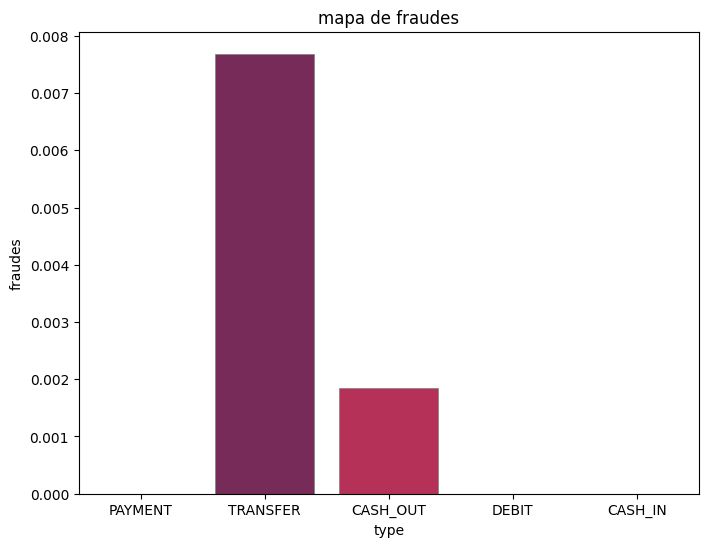

In [15]:
plt.figure(figsize=(8,6))
sns.barplot(
    data=df,
    x='type',
    y='isFraud',
    hue='type',
    errorbar=None,
    palette="rocket",
    linewidth=.5,
    edgecolor=".5"
)
plt.xlabel("type")  
plt.ylabel("fraudes")
plt.title("mapa de fraudes")
plt.legend().remove()  # Aquí se elimina la leyenda
plt.show()

In [16]:
transfer_fraud = df_fraud[df_fraud["type"]== "TRANSFER"]

top_accounts = (
    transfer_fraud.groupby("nameDest")["amount"]
    .sum()
    .nlargest(10)
    .index
)

transfer_fraud = transfer_fraud[transfer_fraud["nameDest"].isin(top_accounts)]

transfer_fraud = transfer_fraud.sort_values(by=["nameDest","step"])

accounts = transfer_fraud["nameDest"].unique()
charts = []

for account in accounts:
    account_data = transfer_fraud[transfer_fraud['nameDest'] == account]

    chart = alt.Chart(account_data).mark_line(point=True).encode(
        x=alt.X("step:O", title="Time or step"),
        y=alt.Y("amount:Q", title=f"Amount sent to account {account}"),
        tooltip=[
            alt.Tooltip("amount:Q"),
            alt.Tooltip("nameDest:N")
        ]
    ).properties(
        title=f"fraudulent account {account}, transactions recieved",
        width=400,
        height=300
    )
    charts.append(chart)
n_cols = 5
rows = [alt.hconcat(*charts[i:i + n_cols]) for i in range(0,len(charts),n_cols)]
mosaic = alt.vconcat(*rows)

mosaic

alt.VConcatChart(...)

In [17]:
df_trans_grouped = df[df["type"] == "TRANSFER"].copy()

# Mapeamos la etiqueta de fraude para que sea legible
df_trans_grouped["isFraud"] = df_trans_grouped["isFraud"].map({
    0: "Not Fraud",
    1: "Fraud"
})

# Creamos una columna para agrupar por bloques de 24 steps (asumiendo 1 día = 24 steps)
df_trans_grouped["step_group"] = (df_trans_grouped["step"] // 24) * 24

# Contamos la cantidad de transacciones por grupo
df_step_block = (
    df_trans_grouped
    .groupby(["step_group", "isFraud"])
    .size()
    .reset_index(name="count")  # ← esto crea la columna 'count'
)

# Graficamos
alt.Chart(df_step_block).mark_bar(opacity=0.7).encode(
    x=alt.X("step_group:O", title="Time step (grouped every 24 steps)"),
    y=alt.Y("count:Q", title="Number of Transfers"),
    color=alt.Color("isFraud:N", title="Fraud Status"),
    tooltip=["step_group", "count", "isFraud"]
).properties(
    width=700,
    height=400,
    title="Transfers over time - Fraud vs Non-Fraud"
)

alt.Chart(...)

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [18]:
df_for_train = pd.get_dummies(df,columns=['type'],drop_first=True)

In [19]:
duplicated = df.duplicated().sum() #checking and deleting duplicated rows
duplicated
df.drop_duplicates()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [20]:
df_nulls = df.isnull().sum()

df_nulls

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64